<a href="https://colab.research.google.com/github/Yuvraj-Jaiswal/Student-Grade-Analysis/blob/main/Student_Grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

data = pd.read_csv("student-mat.csv",sep=";")
data =  data[['age','health','freetime','G1', 'G2', 'G3','failures','studytime','absences']]

data


,age,health,freetime,G1,G2,G3,failures,studytime,absences
0,18,3,3,5,6,6,0,2,6
1,17,3,3,5,5,6,0,2,4
2,15,3,3,7,8,10,3,2,10
3,15,5,2,15,14,15,0,3,2
4,16,5,3,6,10,10,0,2,4
...,...,...,...,...,...,...,...,...,...
390,20,4,5,9,9,9,2,2,11
391,17,2,4,14,16,16,0,1,3
392,21,3,5,10,8,7,3,1,3
393,18,5,4,11,12,10,0,1,0


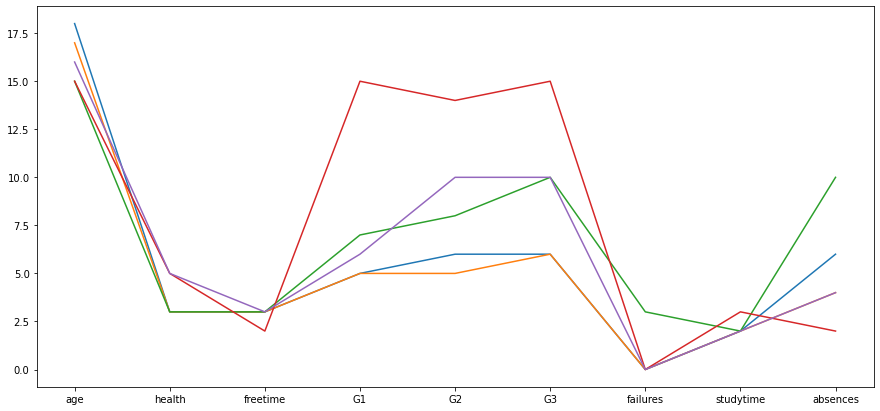

In [143]:
plt.figure(figsize=(15, 7))
for i in range(5):
  plt.plot(data.iloc[i])

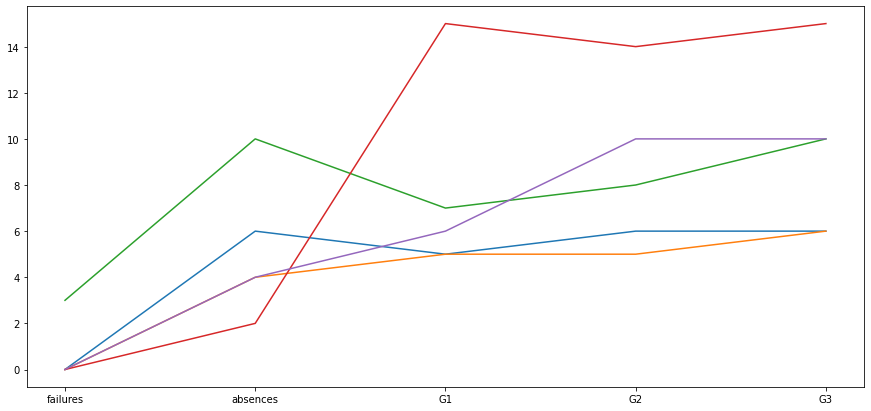

In [144]:
abs = data[['failures','absences','G1', 'G2', 'G3']]
plt.figure(figsize=(15, 7))
for i in range(5):
  plt.plot(abs.iloc[i])

In [145]:
data['absences'].mean()

5.708860759493671

In [146]:
data['G1'].mean()

10.90886075949367

In [147]:
data['G2'].mean()

10.713924050632912

In [148]:
data['G3'].mean()

10.415189873417722

In [149]:
data['failures'].mean()

0.3341772151898734

In [159]:
absant = data['absences'] >= 15
abs_data = data[absant]
abs_data

,G1,G2,G3,failures,studytime,absences
18,6,5,5,3,1,16
29,10,12,11,0,2,16
40,7,10,11,1,2,25
74,11,12,11,0,2,54
89,8,6,7,0,2,18
103,7,6,6,0,2,26
118,9,7,8,1,2,20
123,14,11,13,0,1,18
133,12,11,11,0,1,16
165,12,11,12,1,1,16


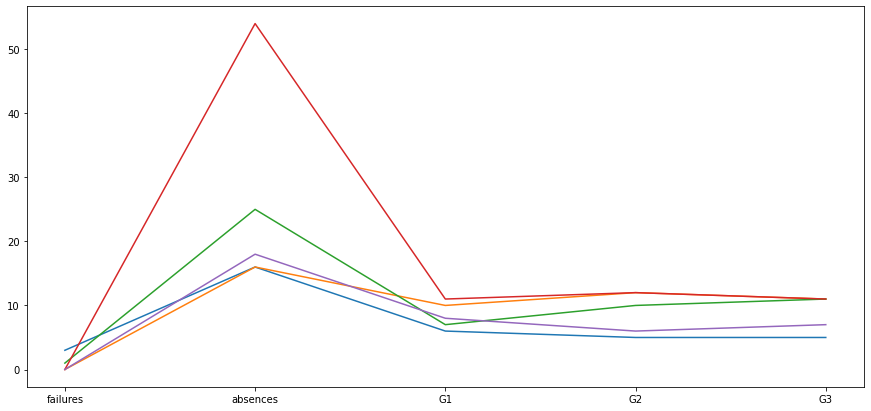

In [173]:
plt.figure(figsize=(15, 7))
abs = abs_data[['failures','absences','G1', 'G2', 'G3']]
for i in range(5):
  plt.plot(abs.iloc[i])

In [151]:
pres = data['absences'] <= 2
pres_data = data[pres]
pres_data

,age,health,freetime,G1,G2,G3,failures,studytime,absences
3,15,5,2,15,14,15,0,3,2
6,16,3,4,12,12,11,0,2,0
8,15,1,2,16,18,19,0,2,0
9,15,5,5,14,15,15,0,2,0
10,15,2,3,10,8,9,0,2,0
...,...,...,...,...,...,...,...,...,...
385,18,4,3,10,9,10,0,3,2
387,19,5,4,7,5,0,1,3,0
388,18,1,3,7,9,8,0,2,0
389,18,5,1,6,5,0,1,2,0


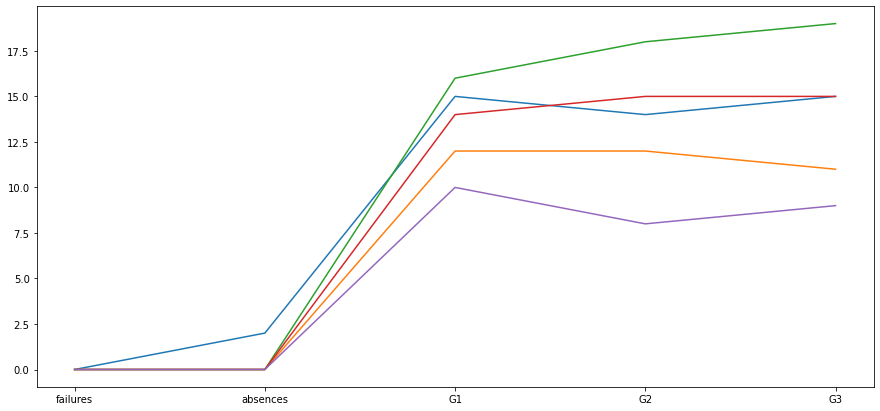

In [174]:
plt.figure(figsize=(15, 7))
pres = pres_data[['failures','absences','G1', 'G2', 'G3']]
for i in range(5):
  plt.plot(pres.iloc[i])

In [152]:
topper = data['G1'] >= 15
top_data = data[topper]
top_data

,age,health,freetime,G1,G2,G3,failures,studytime,absences
3,15,5,2,15,14,15,0,3,2
5,16,5,4,15,15,15,0,2,10
8,15,1,2,16,18,19,0,2,0
22,16,5,5,15,15,16,0,2,2
27,15,1,2,15,16,15,0,1,4
...,...,...,...,...,...,...,...,...,...
363,17,1,3,16,15,15,0,2,0
374,18,1,4,19,18,19,0,3,0
376,20,3,4,15,14,15,2,3,4
378,18,1,1,15,15,15,0,2,0


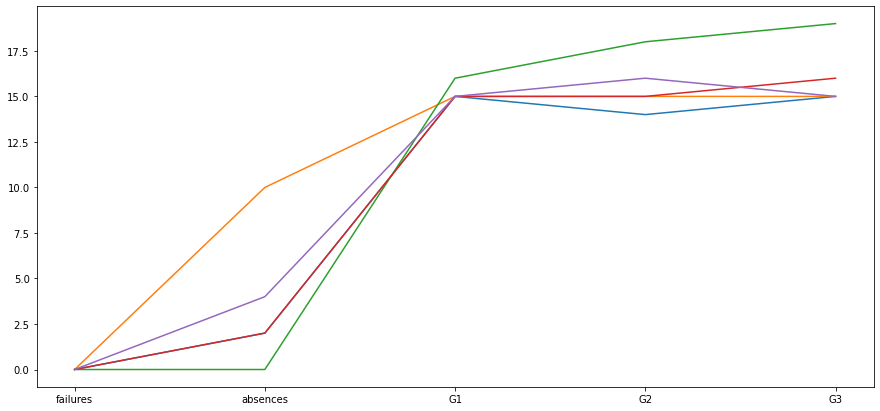

In [175]:
plt.figure(figsize=(15, 7))
topper = top_data[['failures','absences','G1', 'G2', 'G3']]
for i in range(5):
  plt.plot(topper.iloc[i])

In [153]:
failure = data['G1'] <=6
fail_data = data[failure]
fail_data

,age,health,freetime,G1,G2,G3,failures,studytime,absences
0,18,3,3,5,6,6,0,2,6
1,17,3,3,5,5,6,0,2,4
4,16,5,3,6,10,10,0,2,4
7,17,1,1,6,5,6,0,2,6
18,17,5,5,6,5,5,3,1,16
25,16,5,2,6,9,8,2,1,14
79,16,3,4,5,5,5,0,2,12
137,16,5,3,4,0,0,2,1,0
144,17,5,4,5,0,0,3,1,0
146,15,3,3,6,7,0,3,2,0


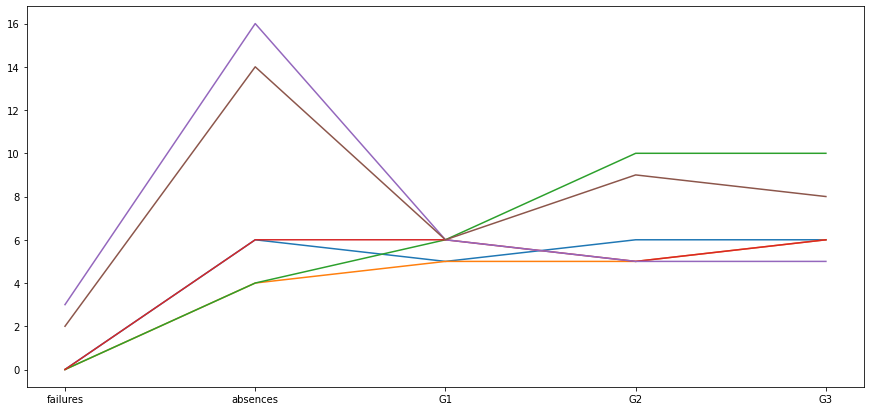

In [178]:
plt.figure(figsize=(15, 7))
failure = fail_data[['failures','absences','G1', 'G2', 'G3']]
for i in range(6):
  plt.plot(failure.iloc[i])

In [154]:
data = pd.read_csv("student-mat.csv",sep=";")
data =  data[['age','health','freetime','G1', 'G2', 'G3','failures','studytime','absences']]

In [155]:
x = data.drop("G3",axis=1)
y = data["G3"]

train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2)

model = LinearRegression()
model.fit(train_x,train_y)

accuracy = model.score(test_x,test_y)
predicted = model.predict(test_x)
print(accuracy)

0.8237629962059241


In [156]:
data = pd.read_csv("student-mat.csv",sep=";")
data =  data[['G1', 'G2', 'G3','failures','studytime','absences']]

In [157]:
x = data.drop("G3",axis=1)
y = data["G3"]

train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2)

model = LinearRegression()
model.fit(train_x,train_y)

accuracy = model.score(test_x,test_y)
predicted = model.predict(test_x)
print(accuracy)

0.8746239021309336
